# Chapter 9

## Ideal Linear Relationship

The simplest type of relationship between a dependent variable $Y$ and independent input variables $x_1, ... x_r$ is a linear one, and it is described as follows...

$$ Y = \beta_0 + \beta_1x_1  + ... + \beta_rx_r$$
 
## Realistic Linear Relationship
 
 If we could always use the above equation to represent the relationship between input and output variables, we'd be quite lucky. Realistically, however, the linear equation above **is subject to random error**, and this random error is described by the constant $e$. Thus, our new and realistic linear equation becomes the following
 
 $$ Y = \beta_0 + \beta_1x_1  + ... + \beta_rx_r + e $$
 
 where $e \sim N(0, \sigma^2)$
 
## Expectation of Linear Relationship

We can look at the above linear relationship involving error and intuitively ask, "what value of $Y$ will we receive given some inputs $x = x_1, x_2, ..., x_r$?" Thus, we can summarize the equation as a conditional expectation: the expected value of $Y$ given $x$.

 $$ E(Y|x) = \beta_0 + \beta_1x_1  + ... + \beta_rx_r $$
 
We don't include $e$ here since its mean is 0.

## Bringing it Together

The equation mentioned earlier, $ Y = \beta_0 + \beta_1x_1  + ... + \beta_rx_r + e $, is known as the *linear regression equation* and it describes the regression, or correspondence, of $Y$ to a set of inputs $x$. The quantities $/beta_0, ... /beta_n$ are known as *regression coefficients*, and they help us shape our linear equation to represent the correspondence between variables as best as possible.

Below is some data that is approximately distributed along
x = y and a line of best fit. Notice that the slope is usually very close to $1$.

Y = A + Bx = 22.505665707722073 + 1.0072153693317052X
n = 10
mean(x) = 2286.0
mean(Y) = 2325.0
mult X*Y = 68722500
mean X*Y = 53149500.0
S_xx = 15461440.0
S_YY = 15686250.0
S_xY = 15573000.0
SS_R = 885.0533973549682
B = 1.0072153693317052
A = 22.505665707722073


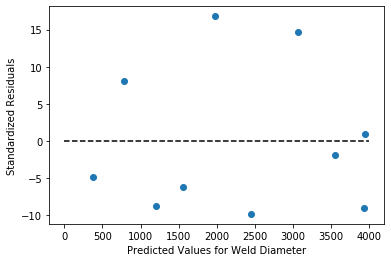

In [9]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt

def generate(frm, to, dev):
    x, y = [], []
    for i in range(frm, to + 1):
        x.append(i)
        y.append(i + random.normalvariate(0, dev))
    return x, y

def regression(X, Y):
    n = len(X)
    mean_X = sum(X)/n
    mean_Y = sum(Y)/n
    mult_XY = sum([ X[i] * Y[i] for i in range(n) ])
    mean_X_times_Y = mean_X * sum(Y)
    S_xx = sum([ (x**2) for x in X ]) - n * mean_X**2
    S_YY = sum([ (y**2) for y in Y ]) - n * mean_Y**2
    S_xY = sum([ (X[i] - mean_X) * (Y[i] - mean_Y) for i in range(n) ])
    S_RR = ((S_xx * S_YY) - S_xY**2) / S_xx
    m = (mult_XY - mean_X_times_Y) / S_xx
    b = mean_Y - m * mean_X
    print("Y = A + Bx = " + str(b) + " + " + str(m) + "X")
    print("n = " + str(n))
    print("mean(x) = " + str(mean_X))
    print("mean(Y) = " + str(mean_Y))
    print("mult X*Y = " + str(mult_XY))
    print("mean X*Y = " + str(mean_X_times_Y))
    print("S_xx = " + str(S_xx))
    print("S_YY = " + str(S_YY))
    print("S_xY = " + str(S_xY))
    print("SS_R = " + str(S_RR))
    print("B = " + str(m))
    print("A = " + str(b))
    return [ (b + m * x) for x in X ]

# x_t, y_t = generate(0, 20, 3)
x_t = [ 370, 780, 1210, 1560, 1980, 2450, 3070, 3550, 3940, 3950 ]
y_t = [ 400, 800, 1250, 1600, 2000, 2500, 3100, 3600, 4000, 4000 ]
y_fit = regression(x_t, y_t)

# plt.plot(x_t, y_fit, 'r')
# plt.scatter(x_t, y_t)
plt.xlabel("Predicted Values for Weld Diameter")
plt.ylabel("Standardized Residuals")

y_res = [ y_fit[i] - y_t[i]  for i in range(len(y_fit)) ]
plt.plot([0, 4000], [0, 0], 'k', linestyle='dashed')
plt.scatter(x_t, y_res)

# plt.plot(x_t, y_fit, 'r')
# plt.scatter(x_t, y_t)
# plt.xlabel("Shear Strength (psi)")
# plt.ylabel("Weld Diameter (.0001 in.)")
plt.show()

## Least Squares Estimators of the Regression Parameters


